# Supernova Remnants Notebook

### Task 1
In this task you will plot the analytical solutions for the Sedov-Taylor phase of the evolution of a supernova remnant.

First load the modules you will need (numpy and matplotlib).

In [17]:
import numpy as np
import matplotlib.pyplot as plt

To calculate these quantities correctly we need to make sure all values are using the same system of units. Here we are using cgs (centimetres, grams, seconds).
To input and output the values it makes more sense to have them in units more suited to astronomy, to make them easier to read.

Define some constants that can be multiplied by the output values so we can print them out in useful units.

For example, time will be calculated in seconds but it is more useful for us to output it in years, or Megayears. 
So we can define:

$yeartosec = 60 \times 60 \times 24 \times 365.25$

Then multiply this by the output to ensure the time we are reading is printed in years. 

Lengths will be calculated in $cm$ - but we want them in $pc$.

Velocities will be calculated in $cm/s$ - but we want them in $km/s$.

Masses will be calculated in grams - but we want them in solar masses. 

In [18]:
#Convert years to seconds
yeartosec = 60 * 60 * 24 *365.25
#Convert parsec to centimetres
pctocm = 3.086E18
#Convert centimetres to kilometres per second for velocity
cmtokm = 1.0E5
#Convert solar masses to grams
sol2gram = 1.989E33

Now we need to define some constant values such as the explosion energy and ambient density of the surrounding *ISM (interstellar medium)*. 

Ambient density = 1.E-26   (units = $g /{cm}^3$)

Explosion energy = 1.E51 (units = $erg$)

(These are both in cgs units so they don't need to be converted)

We should also define the mass of the ejected stellar material. For a type II supnernova this would be above 8M$_{\odot}$, for a type Ia supernova it would be much lower as the white dwarf has already blown all of the external stellar material away. We could estimate it to be below 1M$_{\odot}$ in this case. 
Remember the mass will need to be converted into cgs!

In [19]:
#Ambient density (ISM) in cgs                                                                                                                                                                                                  
rho_ambient = 1.E-26
#Explosion energy in cgs
E_SN = 1.E51
# Ejected mass                                                                                                                                                                                 
M_ejecta = 1.* sol2gram

We are going to be calculating the radius and velocity of the expanding shell during the Sedov-Taylor (ST) phase of the evolution of the SNR. 
To get the initial values for the velocity and radius of the swept up shell for the ST phase, we can estimate the velocity at the end of the free expansion phase.

Work out the initial velocity of the ejected stellar material using the equation below, assuming the explosion energy is converted to kinetic energy. 

### $E_{SN}$ = $\frac{1}{2} M_{e}v_{e}^2$

In [20]:
v_ejecta = (2. * E_SN /	M_ejecta)**(1./2.)
print("Initial velocity of the ejected material: %.2f" % (v_ejecta/cmtokm), "km/s")

Initial velocity of the ejected material: 10027.61 km/s


### Task 2

Next we can work out the shell radius (in parsec) at the end of the free expansion phase, then the time it has taken (in years) to reach that radius. Use the equations below and assume the velocity in the free expansion phase is constant.

$\rho_{0}$ is the ambient density of the surrounding interstellar medium.

### $R_{SW} = \left(\frac{3M_{e}}{4\pi\rho_{0}}\right)^{1/3}$

### $t_{SW} = \frac{R_{SW}}{v_{e}}$

In [21]:
R_SW = (3. * M_ejecta /(4. * np.pi * rho_ambient))**(1./3.)
t_SW = R_SW / v_ejecta
print ("Radius at the end of the free expansion phase = %.2f" %(R_SW/pctocm), "pc")
print ("Time at the end of the free expansion phase = %.2f" %(t_SW/yeartosec), "years")

Radius at the end of the free expansion phase = 11.73 pc
Time at the end of the free expansion phase = 1144.32 years


### Task 3

Now work out the radius and velocity of the expanding shell of gas as a function of time during the Sedov-Taylor phase (where the time starts at the end of the free expansion phase). 

### $R_{Sed}(t) = \left(\frac{25E_{SN}}{4\pi\rho_{0}}\right)^{1/5}t^{2/5}$

### $V_{Sed}(t) = \frac{2}{5}\left(\frac{25E_{SN}}{4\pi\rho_{0}}\right)^{1/5}t^{-3/5}$

Remember to use cgs units for the values in your calculations, then convert back to more sensible values (i.e. parsec,  years and km/s) afterwards. 

In [22]:
t_start = 1144
t_end = 20000 #years                                                                                                                                                                                                           


#Define arrays
R_sed =[]
V_sed =[]
t_sed =[]


#Loop over time                                                                                                                                                                                                                
for i in range(t_start, t_end, 10):
    Time = i * yeartosec
    t_sed.append(Time/yeartosec)
    
    Radius = ((25.  * E_SN)/(4. * np.pi * rho_ambient))**(1./5.) * (Time)**(2./5.)
    R_sed.append(Radius/pctocm)
    
    Velocity = (2.0/5.0)*((25.0 * E_SN)/(4. * np.pi  * rho_ambient))**(1./5.) * Time**(-3./5.)
    V_sed.append(Velocity/cmtokm)

print ("Values after expansion in the Sedov-Taylor phase after 20 000 years:")
print ("Radius = %.2f" % (R_sed[-1]), "pc")
print ("Velocity = %.2f" %(V_sed[-1]), "km/s")

Values after expansion in the Sedov-Taylor phase after 20 000 years:
Radius = 49.02 pc
Velocity = 958.97 km/s


Use the subplot function within matplotlib to create two plots showing the evolution of the shell radius with time and the shell velocity with time. 

Remember to add titles and axis labels.

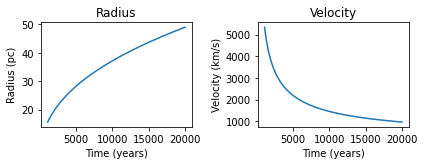

In [23]:
plt.subplot(2,2,1)
plt.plot(t_sed, R_sed)
plt.title('Radius')
plt.ylabel('Radius (pc)')
plt.xlabel('Time (years)')

plt.subplot(2,2,2)
plt.plot(t_sed, V_sed)
plt.title('Velocity')
plt.ylabel('Velocity (km/s)')
plt.xlabel('Time (years)')

plt.tight_layout()
plt.show()

### Task 4

Now we can apply our estmations for the radius and velocity of a SNR to an observed SNR.

The SNR Tycho has an age of 442 years and an ISM density, $\rho_{0} = 3.34\times10^{-25}$gcm$^{-3}$

Using this information and the equations above, estimate the radius and velocity of the Tycho SNR (you can use the same supernova energy as earlier).

In [24]:
#Convert the time into seconds
Time = 422 * yeartosec
#The density is already in cgs so we do not need to convert it
rho_ambient = 3.34e-25


R_Tycho = ((25.  * E_SN)/(4. * np.pi * rho_ambient))**(1./5.) * (Time)**(2./5.)
V_Tycho = (2.0/5.0)*((25.0 * E_SN)/(4. * np.pi  * rho_ambient))**(1./5.) * Time**(-3./5.)

#Convert radius to pc and velocity to km/s as these units are more useful to us
R_Tycho = R_Tycho / pctocm
V_Tycho = V_Tycho / 1.e5
print ("Radius of Tycho SNR after 422 years in pc = %.2f" % R_Tycho, "pc")
print ("Velocity of Tycho SNR after 422 years = %.2f" % V_Tycho, "km/s")

Radius of Tycho SNR after 422 years in pc = 5.19 pc
Velocity of Tycho SNR after 422 years = 4812.90 km/s


The real radius of the Tycho SNR is 3.7pc and the shock velocity is around 4500km/s. 
So we can get close values with our very simple models!

### Task 5

What elements are made in a core-collapse supernovae (CCSNe)? They are the main source of oxygen in nature! In this task you will read in the mass coordinates of the ejecta and the abundances from a real CCSN model (by Ritter et al. 2018, MNRAS - https://ui.adsabs.harvard.edu/abs/2018MNRAS.480..538R/abstract) for a progenitor of 15M$_{\odot}$ and solar metallicity. Plot the abundances with respect to mass coordinate and calculate the ejected elements in solar masses.

First, read in the date from the file 'm15z0p02_abundances_mass.txt'

In [11]:
# read file with SN 15Msun Z=0.02
a=open('m15z0p02_abundances_mass.txt')
header= a.readline()
data=a.readlines()
a.close()

Now set up the data ready for plotting. You will need to create an array with the mass coordinates and an array for each isotope provided.

In [12]:
# setup data for plot
iso_list = header.split()[2:9]
mass = [float(data[i].split()[0]) for i in range(len(data))]
iso_abund = []
for j in range(len(iso_list)):
    dum = [float(data[i].split()[j+1]) for i in range(len(data))]
    iso_abund.append(dum)

Now, check that the arrays that you created are correct. Do they make sense? How would you check? You will notice that the mass coordinates will not start from zero. Where do the mass coordinates start? What is happening to the deeper material?




In [13]:
print('masscut=',min(mass),'Msun')

masscut= 1.610542 Msun


Make a plot of the abundance, X (mass fraction) versus mass coordinates (in solar masses)

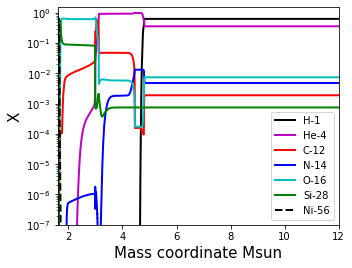

In [14]:
ifig=121; plt.figure(ifig)

symb = ['k-','m-','r-','b-','c-','g-','k--','m--','r--','b--','c--',\
        'k..','m--','r--','b--','c--']*5


for i in range(len(iso_list)):
    plt.semilogy(mass,iso_abund[i],symb[i],lw=2,label=iso_list[i])
    
plt.legend(loc='lower right')
plt.xlim(min(mass),12); plt.ylim(1e-7,1.5)
plt.xlabel('Mass coordinate Msun',fontsize=15); plt.ylabel('X',fontsize=15)
plt.gcf().subplots_adjust(left=0.25)    

plt.savefig('figure_test.pdf')
plt.show()

Oh! you got in the plot a onion-shell structure, but it is a bit different.. :)
In the file, you have the abundances for the isotopes H, He4, C12, O16, Si28 and Ni56. 
Now calculate what is the abundance of these isotopes in the SN ejecta, in solar mass units. How would you do it? You have mass coordinates (in solar masses), and abundances in mass fraction. 

In [15]:
# how many solar masses of isotope is ejected?
#iso_ = 'H-1'#'Ni-56'
# first I need to calculate dm
dm = [mass[i]-mass[i-1] for i in range(1,len(mass))]; dm.append(dm[-1])
#.. then summing up X*dm over range of ejecta
for iso_ in iso_list:
    print(iso_ , \
          str('%15.6E' % np.sum(np.array(iso_abund[iso_list.index(iso_)])*np.array(dm))),\
          'Msun')

H-1    4.609672E+00 Msun
He-4    4.193484E+00 Msun
C-12    1.463858E-01 Msun
N-14    4.204498E-02 Msun
O-16    8.911354E-01 Msun
Si-28    1.471293E-01 Msun
Ni-56    2.553114E-02 Msun


What is the most abundant isotope among the ones considered? From the lecture, you may remember about Ni56. What do you know about the others?

In [16]:
print("Hydrogen is the most abundant")

Hydrogen is the most abundant
